# Explore here

# Predecir el coste del seguro médico de una persona.

Importación de las librerías necesarias

In [2]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Librería para el escalado de varibles, asegurando mismo rango (0 a 1):
from sklearn.preprocessing import MinMaxScaler

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

## **Paso 1. Lectura de datos.**
Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta:https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv y se ha cargado en un Data Frame:

In [3]:
# Importamos el archivo e imprimimos las primeras filas del dataframe para tener una visión rápida del conjunto
data_med = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

# Se muestran las 5 primeras filas del Data Frame
data_med.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


En esta parte es importante tener claro el significado de todos los campos:
- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. índice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numérico)

In [4]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data_med.shape[0]} beneficiarios, con un total de {data_med.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 1338 beneficiarios, con un total de 7 datos característicos de cada uno de ellos.


In [5]:
# Descripción general del DataFrame
data_med.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- En esta parte concluímos que no existen valores nulos en ningún campo
- Nos encontramos con 3 variables categóricas y 4 numéricas

In [6]:
# Estadísticas descriptivas básicas
data_med.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## **Paso 2. Limpieza de datos**

### **Paso 2.1 - Análisis de Duplicados y Constantes:**
Uno de los puntos críticos a la hora de realizar un análisis, es la existencia de variables / características comunes a todos los clientes, dado que sería información redundante y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría prescindir de ellas.

In [7]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda data_med: (data_med.nunique() == 1).sum())(data_med)} columnas en el Data Frame con un valor constante para todos los clientes.");

# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
data_med.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los clientes.
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

A partir del resultado obtenido, se puede observar que no hay ninguna constante en los datos cargados, por lo tanto, no hay que eliminar ninguna columna, de momento.

Otro factor determinante a la hora de realizar una limpieza de los datos es detectar si hay datos repetidos, aplicado a este caso, si hay clientes duplicados.

In [8]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data_med.duplicated().sum()} clientes duplicados.")

 Hay un total de 1 clientes duplicados.


In [9]:
# Al existir duplicados los visualizamos:
duplicados = data_med.duplicated(keep=False)
filas_duplicadas = data_med[duplicados]
filas_duplicadas


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# Finalmente eliminamos los duplicados:
data_bank = data_med.drop_duplicates()
data_bank.shape

(1337, 7)

## **Paso 3. Graficado de variables.**

### **Paso 3.1 Análisis de variables individuales numéricas** 

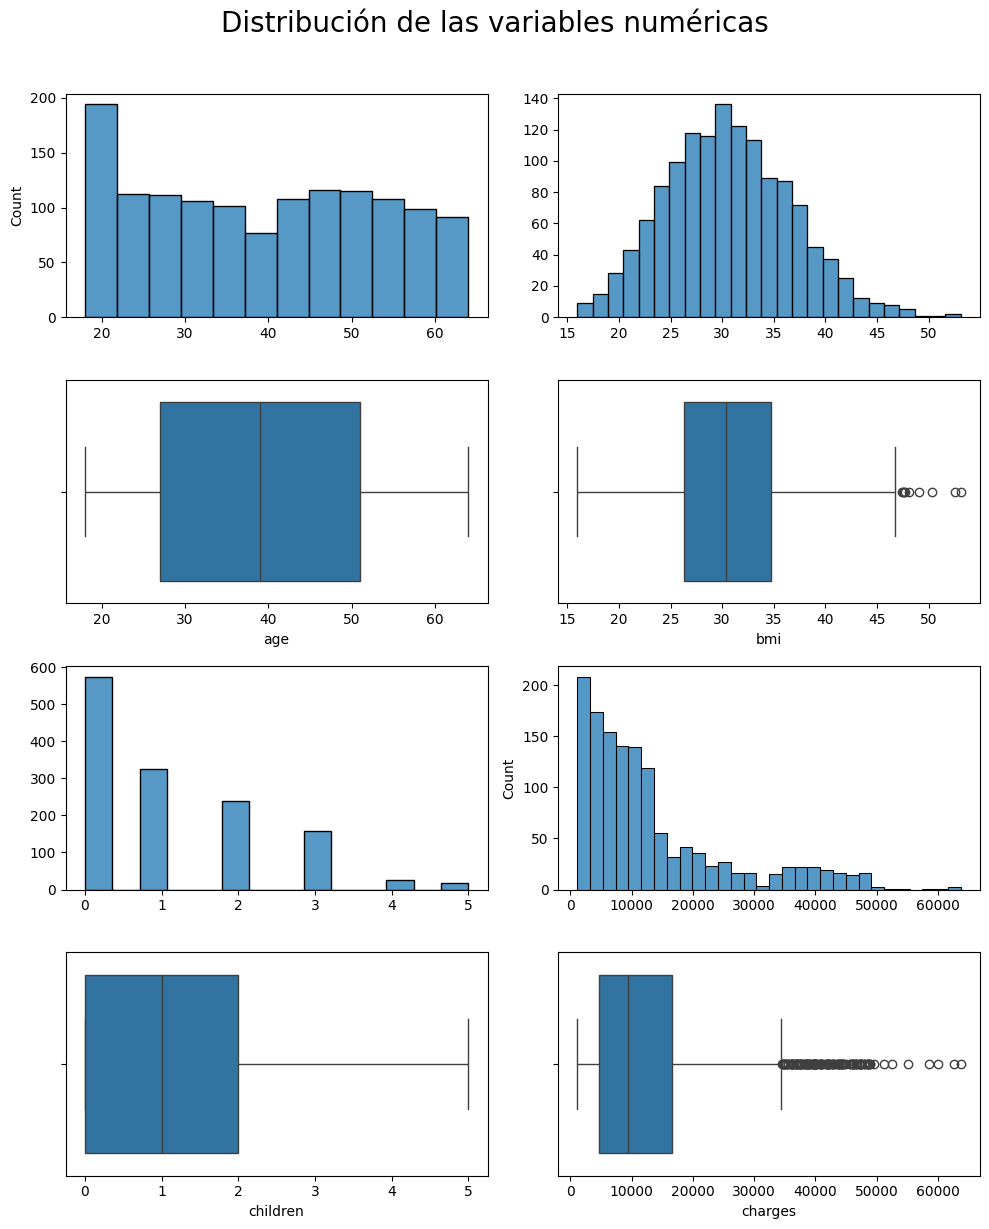

In [11]:
# Crear una figura con los histogramas y diagramas de caja
fig, axis = plt.subplots(4, 2, figsize=(10, 12))

# Añadir un título global al conjunto de subplots
fig.suptitle("Distribución de las variables numéricas", fontsize=20, y=1.02)

# Creanos los múltiples histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data_med, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data_med, x="age")
sns.histplot(ax=axis[0, 1], data=data_med, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data_med, x="bmi")
sns.histplot(ax=axis[2, 0], data=data_med, x="children").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=data_med, x="children")
sns.histplot(ax=axis[2, 1], data=data_med, x="charges").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=data_med, x="charges")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

De las anteriores gráficas leemos:
- La media de edad se sitúa en torno a los 40 años. Abarcando desde los 27 a los 52 años aproximádamente.
- El BMI (índice de masa corporal) se encuentra del 25 al 35 encontrándonos con valores outlaiers en esta grafica.
- La mayoría de beneficiarios no tienen hijos. Aunque si sumamos todos los beneficiarios que tienen 1, 2, 3  o más hijos sobrepasan a los que no tienen ninguno.
- La prima se sitúa en los 10.000 de media pero existen muchos outlaiers en esta gráfica por encima de los 30.000 y superando incluso los 60.000


### **Paso 3.2 Análisis de variables individuales categóricas** 

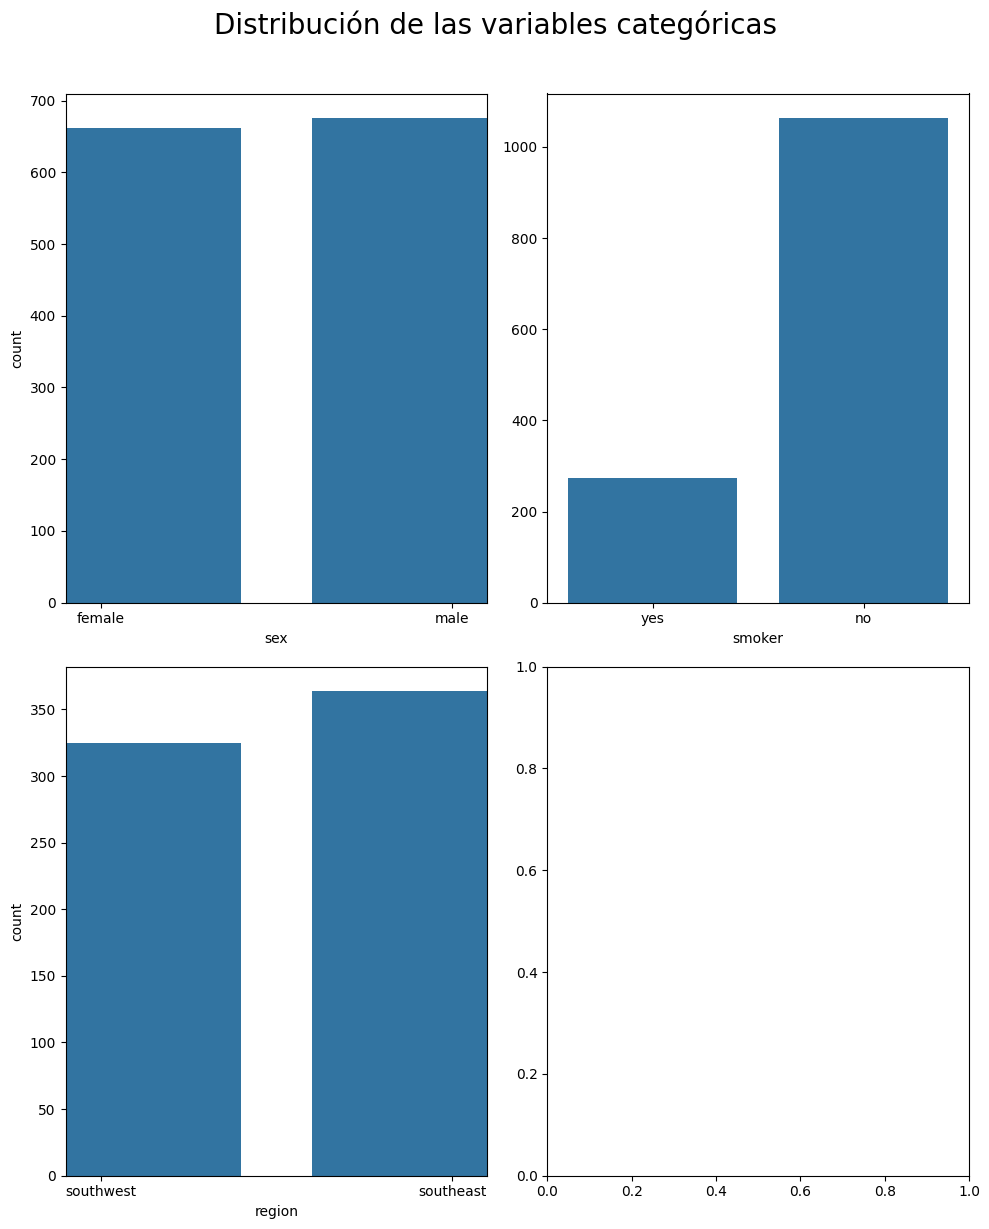

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (10, 12))

# Añadir un título global al conjunto de subplots
fig.suptitle("Distribución de las variables categóricas", fontsize=20, y=1.02)

# Generamos gráficos de barras para visualizar las variables categóricas.
sns.countplot(ax = axis[0, 0], data = data_med, x = "sex").set_xlim(-0.1, 1.1)
sns.countplot(ax = axis[0, 1], data = data_med, x = "smoker").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data_med, x = "region").set_xlim(-0.1, 1.1)



# Ajustar el layout y título
plt.tight_layout()


# Mostrar el plot
plt.show()

- La distribución de beneficiarios es prácticamente simétrica tanto en sexo como en region.
- Donde si existe una gran diferencia es en fumadores, donde más del 80% son **no fumadores**.

### **Paso 3.3 Análisis de 2 variables en conjunto** 

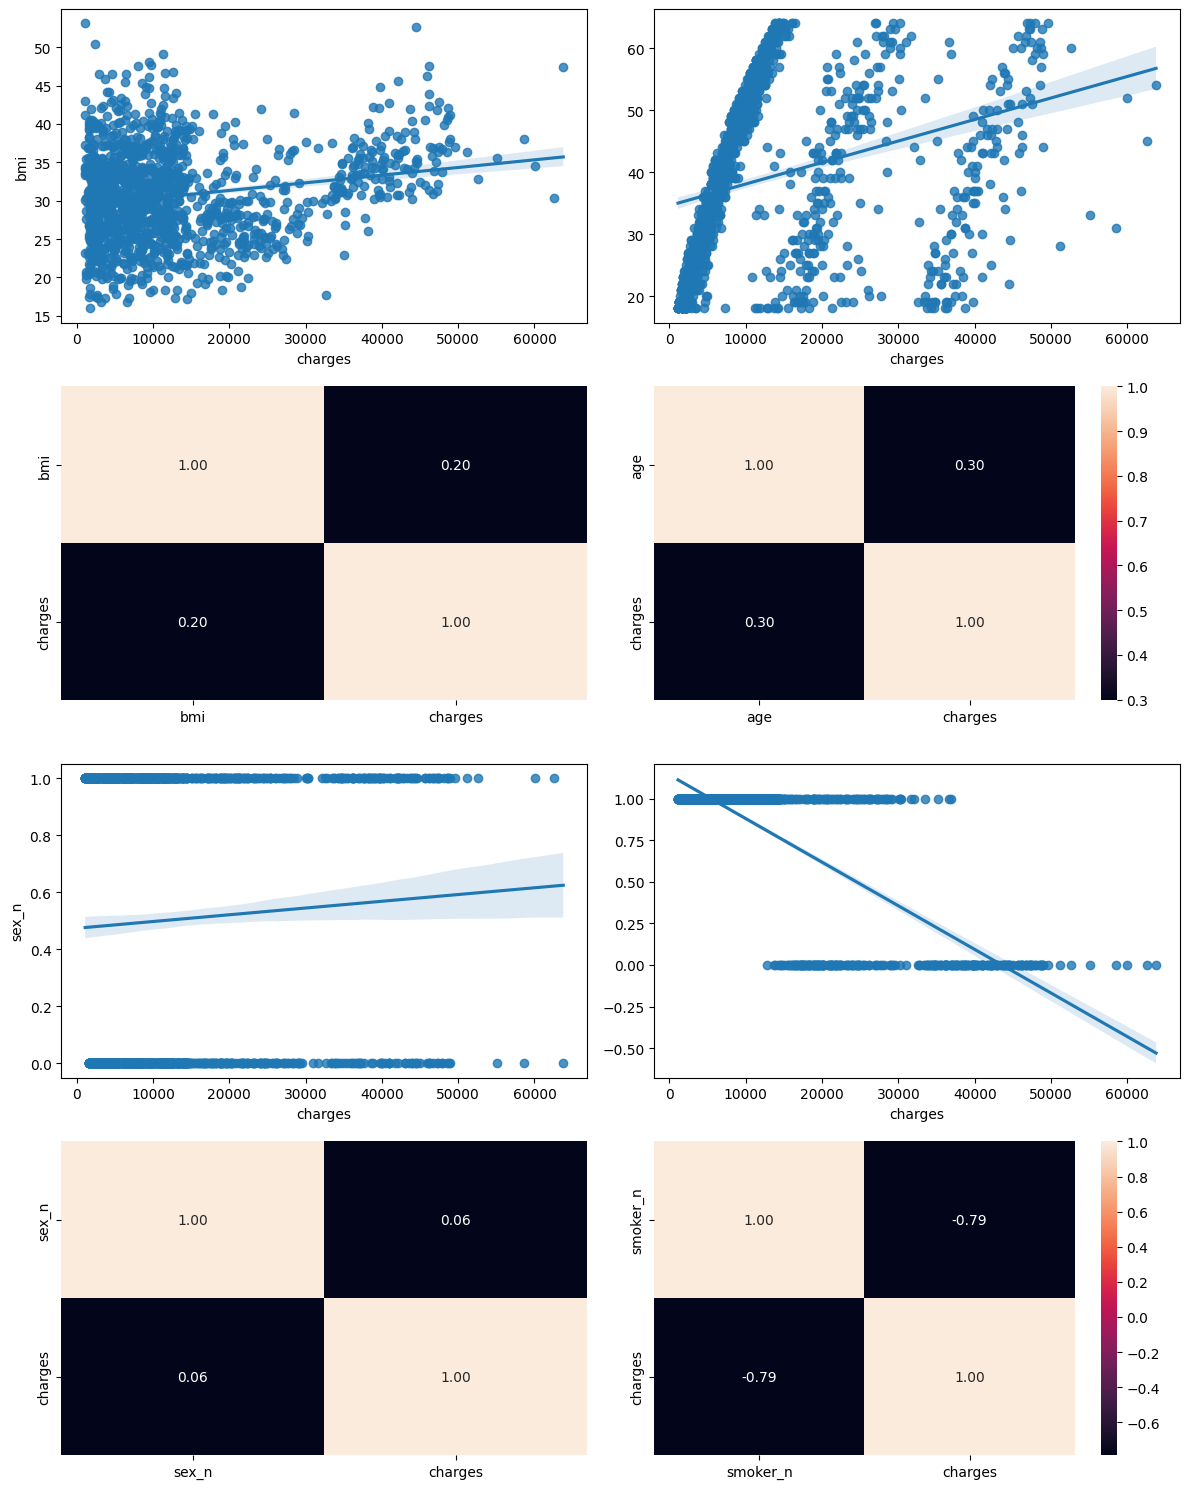

In [13]:
#Factorizamos las variables numéricas que nos interesa mostrar:
data_med['sex_n'] = pd.factorize(data_med['sex'])[0]
data_med['smoker_n'] = pd.factorize(data_med['smoker'])[0]


# Creamos la figura para los diagramas
fig, axis = plt.subplots(4, 2, figsize = (12, 15))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_med, x = "charges", y = "bmi")
sns.heatmap(data_med[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_med, x = "charges", y = "age").set(ylabel=None)
sns.heatmap(data_med[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data_med, x = "charges", y = "sex_n")
sns.heatmap(data_med[["sex_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = data_med, x = "charges", y = "smoker_n").set(ylabel=None)
sns.heatmap(data_med[["smoker_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- El diagrama de dispersión muestra una relación levemente positiva entre el BMI (Índece de masa corporal) y los costos médicos.

Existe una alta dispersión en los datos, lo que sugiere que bmi no es un factor determinante en el costo médico.

- La relación es más clara: a mayor edad, mayores tienden a ser los costos médicos.

La tendencia lineal sugiere que la edad tiene un impacto significativo en los gastos médicos.

- La edad tiene un mayor impacto en los costos médicos que el IMC, pero ambos factores presentan correlaciones relativamente bajas.
- Correlación bmi y charges: positiva pero débil. 
- Correlación age y charges: positiva moderada.

### **Paso 3.4 Análisis de Observaciones Influyentes:**
En este paso se va a proceder a realizar uno de los puntos clave en el Análisis Exploratorio de Datos, la Identificación de Observaciones Influyentes.

Sin embargo, para poder realizar este paso, es necesario que todas las variables con las que se trabaja sean numéricas.

In [15]:
# Factorizamos las variables categóricas que nos falten:
data_med['region_n'] = pd.factorize(data_med['region'])[0]

# Ahora creamos una lista con todas las variable numéricas (incluyendo las variables categóricas que acabamos de transformar)
num_variables = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]

# Escalado de variables numéricas usando Min-Max Escaler. Así nos aseguramos de que todas las variables estén en el mismo rango (0 a 1)
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_med[num_variables])
data_med = pd.DataFrame(scal_features, index=data_med.index, columns=num_variables)
data_med.head()

,age,sex_n,bmi,children,smoker_n,region_n,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


Una vez ya se cuenta con todas las características numéricas, se puede proceder a identificar las observaciones influyentes.

Para ello, en primer lugar es necesario identificar cuál será, de ahora en adelante la variable dependiente, es decir, la variable a predecir y separar tanto esta como todas las relacionadas con ella.

En este caso consideramos como la variable a predecir: "charges"

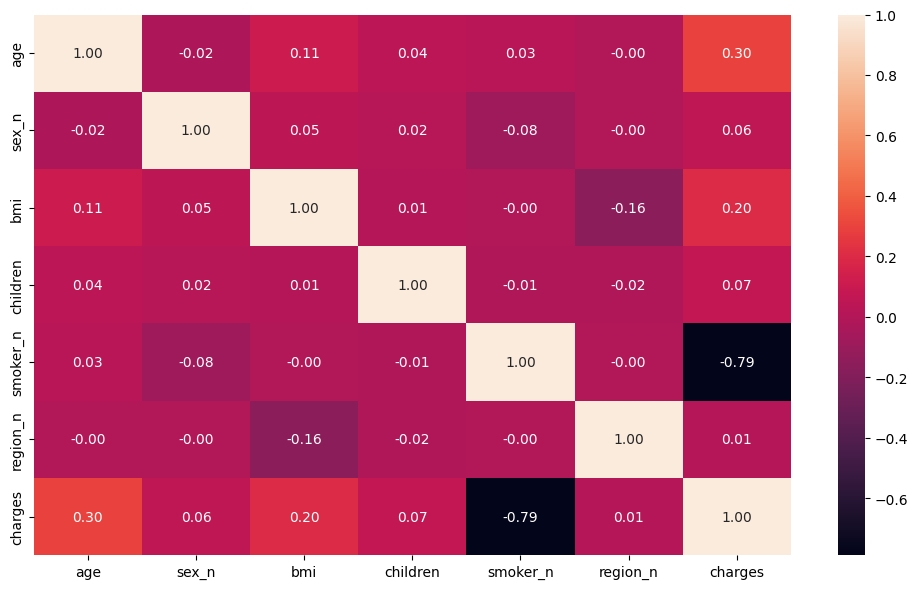

In [19]:
# Definir el tamaño de la figura
plt.figure(figsize=(10, 6))  # Cambia los valores según tus necesidades

# Graficamos todas las variables numéricas y las que transformamos a numéricas en el paso anterior (factorizar)
sns.heatmap(data_med[num_variables].corr(), annot = True, fmt = ".2f")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

- En el gráfico queda patente que las variables independientes más influyentes en nuestra variable dependienten ("charges") son: smoker_n con una correlación negativa alta(-0.79), y age con una correlación positiva moderada(0.30).